
a) Elaborar uma an ́alise descritiva da base de dados, an ́alise gra ́fica e por tabelas. (10%)<br>
b) Realize a compara ̧ca ̃o entre a quantidade e o pre ̧co agrupados por pa ́ıses (Use ANOVA). (40%)<br>
c) Corrigir os problemas dos pressupostos da ANOVA e gerar o modelo mais ajustado para os dados. (40%)<br>
d) Interpretar os resultados e evidenciar as principais tomadas de decis ̃oes poss ́ıveis com os resultados encontrados. (10%)

                                        ### desenvolvimento ###


## Objetivo

The general flow of conducting an ANOVA analysis involves several steps. Here's a step-by-step outline of the typical process:

Define the Research Question: Clearly articulate the research question or objective of your analysis. This helps determine the specific hypotheses to be tested and the variables involved.

Formulate Hypotheses: State the null and alternative hypotheses based on the research question. The null hypothesis assumes that there are no significant differences among the groups, while the alternative hypothesis suggests that at least one group differs from the others.

Data Preparation: Collect and organize the data. Ensure that you have a continuous dependent variable and a categorical independent variable representing the groups you want to compare.

Check Assumptions: Assess the assumptions of the ANOVA, including normality of residuals, homogeneity of variances, and independence of observations. You can use statistical tests or visual inspections to evaluate these assumptions.

Perform ANOVA: Apply the ANOVA test to examine the differences among group means. Use appropriate software or programming tools to run the ANOVA analysis.

Interpret ANOVA Results: Analyze the ANOVA output, including the F-statistic, p-value, and effect size measures. Determine whether the null hypothesis can be rejected based on the chosen significance level (e.g., α = 0.05).

Post-hoc Comparisons (if necessary): If the ANOVA yields a significant result, perform post-hoc tests (e.g., Tukey's test, Bonferroni correction) to compare specific pairs of groups and identify significant differences. Adjust the significance level for multiple comparisons, if required.

Effect Size: Consider the effect size measures, such as eta-squared or partial eta-squared, to determine the practical significance of the observed differences.

Interpretation and Conclusion: Based on the results, provide an interpretation of the findings in the context of the research question. Summarize the main findings and draw conclusions about the differences among the groups.

Report and Present Results: Document the ANOVA analysis, including the methodology, results, and any additional analyses performed. Present the findings in a clear and concise manner, using appropriate tables, figures, or visualizations.

### Método

Import the Required Libraries: Start by importing the necessary libraries for data manipulation, statistical analysis, and visualization. Common libraries include pandas, NumPy, and statsmodels.

Load and Prepare the Data: Load your dataset into a pandas DataFrame and preprocess the data as needed. Ensure that you have a continuous dependent variable and a categorical independent variable representing the groups.

Explore the Data: Conduct exploratory data analysis (EDA) to understand the characteristics of the data, such as summary statistics, distributions, and relationships between variables. Visualizations like histograms, box plots, and scatter plots can be helpful.

Check Assumptions: Evaluate the assumptions of ANOVA, including normality of residuals and homogeneity of variances. You can use statistical tests (e.g., Shapiro-Wilk test, Levene's test) or visual inspections (e.g., Q-Q plots, residual plots) to assess these assumptions.

Perform the ANOVA: Use the appropriate function or method to conduct the ANOVA analysis. In Python, you can use libraries like statsmodels or scipy.stats to perform ANOVA. Construct the ANOVA model, fit it to the data, and obtain the ANOVA table.

Interpret the ANOVA Results: Analyze the ANOVA table to understand the significance of the group differences. Look at the F-statistic, p-value, and other relevant statistics. Determine whether the null hypothesis can be rejected based on the chosen significance level.

Post-hoc Comparisons (if needed): If the ANOVA indicates significant group differences, you can perform post-hoc tests to compare specific pairs of groups. Common post-hoc tests include Tukey's test, Bonferroni correction, or pairwise t-tests. Adjust the significance level for multiple comparisons, if required.

Effect Size Analysis: Consider effect size measures, such as eta-squared or partial eta-squared, to determine the practical significance of the observed differences. Effect sizes help quantify the magnitude of the group differences and the proportion of variance explained by the group factor.

Interpretation and Conclusion: Interpret the results in the context of your research question and the specific analysis. Provide meaningful explanations of the observed group differences or lack thereof. Summarize the main findings and draw conclusions based on the results.

Report and Visualize: Document the ANOVA analysis in a clear and concise manner. Present the results using appropriate tables, figures, or visualizations to effectively communicate the findings. Include relevant statistical details, such as p-values, effect sizes, and confidence intervals.

#### Bibliotecas

In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import statistics as stat
from scipy import optimize
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from scipy.stats import tukey_hsd
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
import requests
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Leitura dos Dados

In [15]:
# Load the first CSV file into a dataframe
df1 = pd.read_csv('Year 2009-2010.csv', sep = ',', encoding='latin-1')

# Load the second CSV file into another dataframe
df2 = pd.read_csv('Year 2010-2011.csv', sep = ',', encoding='latin-1')

# Concatenate the two dataframes vertically
data = pd.concat([df1, df2], axis=0)

# Reset the index of the combined dataframe
data = data.reset_index(drop=True)

print(data.shape)
print(list(data.columns))

(1067371, 8)
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


In [16]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [17]:
#Procurando colunas com valores Nan

data.isnull().sum(axis = 0)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [18]:
data.duplicated().value_counts()

False    1033036
True       34335
Name: count, dtype: int64

In [19]:
data[data.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,12/1/2009 11:34,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,12/1/2009 11:34,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [20]:
# Filtrando as colunas

data = data.filter(['Quantity','Price','Country'])

In [21]:
# Mostrando os dados unicos

data_uni = pd.concat([d.reset_index(drop=False) for d in [data.nunique(), data.dtypes]], axis=1)
data_uni = data_uni.transpose()
data_uni = data_uni.drop_duplicates().transpose()
data_uni.columns = ['variaveis','unique','dtype']
data_uni

,variaveis,unique,dtype
0,Quantity,1057,int64
1,Price,2807,float64
2,Country,43,object


In [22]:
# Mostrando os paises

print('Countries')
countries = data['Country'].unique()
print(countries)

# Separate the data by country
country_groups = data.groupby('Country')

Countries
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']


In [23]:
#Frequencies of Countries
data["Country"].value_counts()

Country
United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169


In [24]:
# Drop rows where 'Values' column is 0
data = data[data['Price'] != 0]
# Check for negative values in the 'Values' column
has_negative = (data['Price'] == 0).any().sum()

if has_negative:
    print("DataFrame contains negative values.")
else:
    print("DataFrame does not contain negative values.")
has_negative

DataFrame does not contain negative values.


0

In [25]:
data['Price'] = (data['Price'])**(0.5)
data['Quantity'] = (data['Quantity'])**(0.5)
#data


/var/folders/bl/4t3brvrs4cz3l10bv4wpczw40000gn/T/ipykernel_33631/3723444615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = (data['Price'])**(0.5)
/var/folders/bl/4t3brvrs4cz3l10bv4wpczw40000gn/T/ipykernel_33631/3723444615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'] = (data['Quantity'])**(0.5)


In [26]:
# Check for infinite values
has_infinite = np.isinf(data['Price']).any()

if has_infinite:
    print("DataFrame contains infinite values.")
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


### Tratamento e Descrição dos Dados


In [ ]:
# Group the data by country
grouped_data = data.groupby('Country')

# Get the number of unique countries
num_countries = len(grouped_data)

# Calculate the number of rows and columns in the grid
num_rows = (num_countries + 2) // 3
num_cols = min(num_countries, 3)

# Create a grid of subplots for Q-Q plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 72))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and populate the subplots with Q-Q plots
for i, (country, group) in enumerate(grouped_data):
    ax = axes[i]
    stats.probplot(group['Price'], plot=ax)
    ax.set_title(f'Q-Q Plot - {country}')

# Remove any empty subplots
if num_countries < len(axes):
    for i in range(num_countries, len(axes)):
        fig.delaxes(axes[i])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
from scipy.stats import shapiro

show_shapiro_price = []

# Iterate over each country group
for country, group_data in country_groups:
    variable_data = group_data['Price']
    
    # Perform Shapiro-Wilk test for normality
    _, p_value = shapiro(variable_data)
    
    print(f"Shapiro-Wilk test Price for {country}: p-value = {p_value}")
    if p_value > 0.05:
        show_shapiro_price.append(country)
print('-----'*10)
print(show_shapiro_price, str(len(show_shapiro_price)) + ' / ' + str(len(country_groups)))

Shapiro-Wilk test Price for Australia: p-value = 0.0
Shapiro-Wilk test Price for Austria: p-value = 0.0
Shapiro-Wilk test Price for Bahrain: p-value = 4.543826773173443e-11
Shapiro-Wilk test Price for Belgium: p-value = 0.0
Shapiro-Wilk test Price for Bermuda: p-value = 3.4515295510573196e-07
Shapiro-Wilk test Price for Brazil: p-value = 1.0252099169605344e-09
Shapiro-Wilk test Price for Canada: p-value = 5.836375883859515e-32
Shapiro-Wilk test Price for Channel Islands: p-value = 0.0
Shapiro-Wilk test Price for Cyprus: p-value = 0.0
Shapiro-Wilk test Price for Czech Republic: p-value = 8.17635265049077e-11
Shapiro-Wilk test Price for Denmark: p-value = 6.243613666738555e-38
Shapiro-Wilk test Price for EIRE: p-value = 0.0
Shapiro-Wilk test Price for European Community: p-value = 2.1970038233121159e-07
Shapiro-Wilk test Price for Finland: p-value = 0.0
Shapiro-Wilk test Price for France: p-value = 0.0
Shapiro-Wilk test Price for Germany: p-value = 0.0
Shapiro-Wilk test Price for Greece:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test Price for Unspecified: p-value = 0.0
Shapiro-Wilk test Price for West Indies: p-value = 2.0356776531116338e-07
--------------------------------------------------
['Saudi Arabia'] 1 / 43


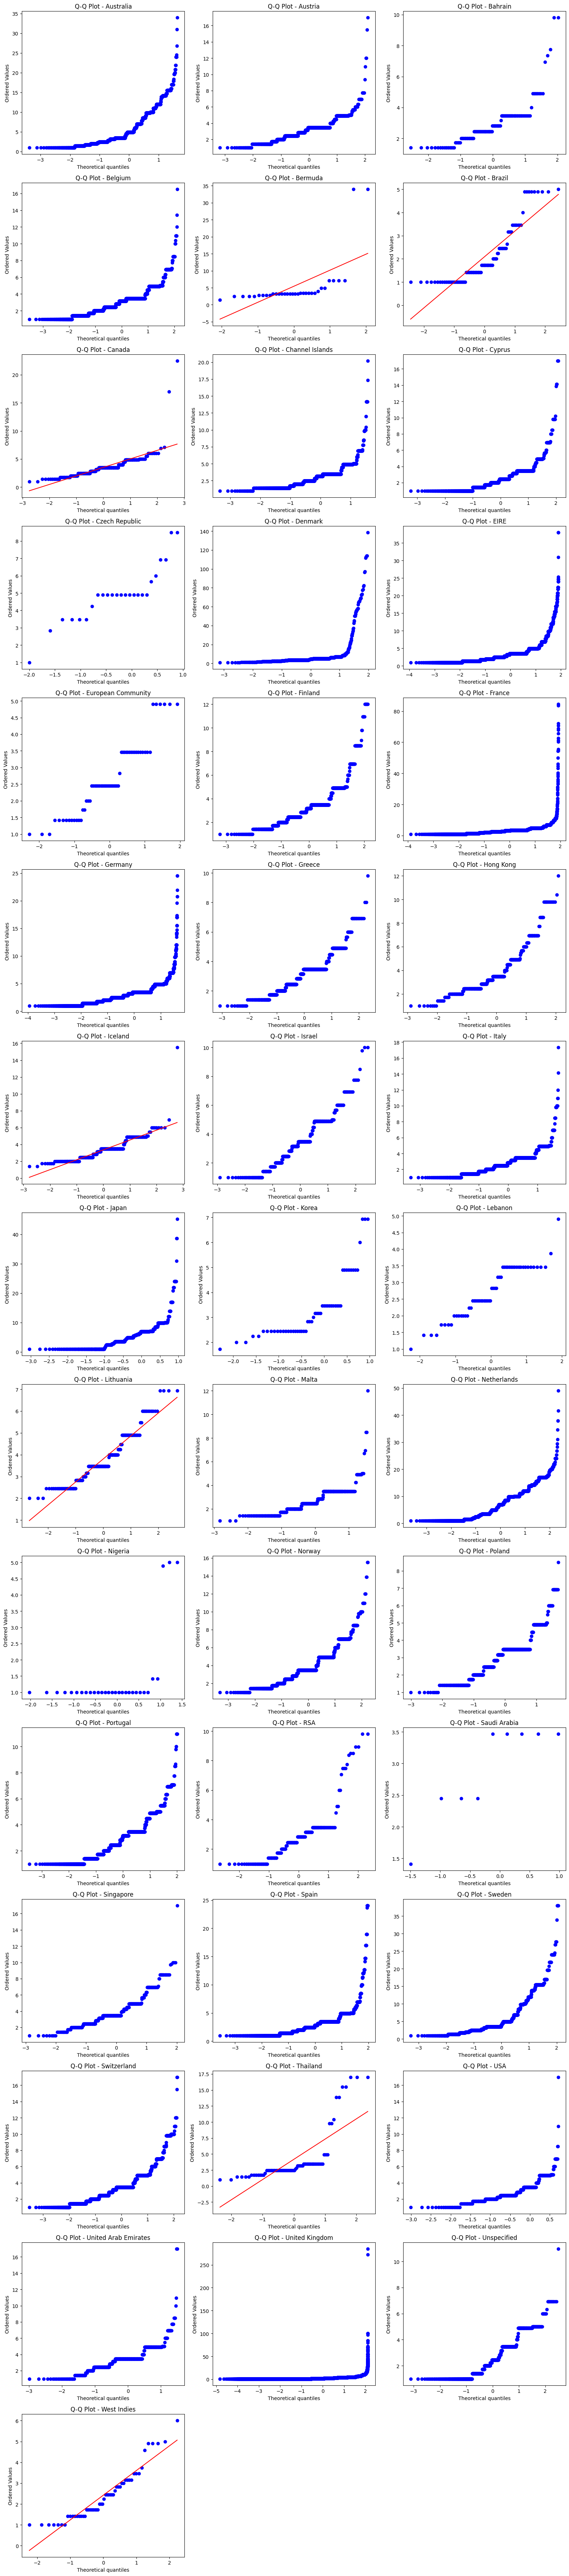

In [29]:
# Get the number of unique countries
num_countries = len(grouped_data)

# Calculate the number of rows and columns in the grid
num_rows = (num_countries + 2) // 3
num_cols = min(num_countries, 3)

# Create a grid of subplots for Q-Q plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 72))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and populate the subplots with Q-Q plots
for i, (country, group) in enumerate(grouped_data):
    ax = axes[i]
    stats.probplot(group['Quantity'], plot=ax)
    ax.set_title(f'Q-Q Plot - {country}')

# Remove any empty subplots
if num_countries < len(axes):
    for i in range(num_countries, len(axes)):
        fig.delaxes(axes[i])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
from scipy.stats import shapiro

show_shapiro_quant = []

# Iterate over each country group
for country, group_data in country_groups:
    variable_data = group_data['Quantity']
    
    # Perform Shapiro-Wilk test for normality
    _, p_value = shapiro(variable_data)
    
    print(f"Shapiro-Wilk test Quantity for {country}: p-value = {p_value}")
    if p_value > 0.05:
        show_shapiro_quant.append(country)
print('-----'*10)
print(show_shapiro_quant, str(len(show_shapiro_quant)) + ' / ' + str(len(country_groups)))

Shapiro-Wilk test Quantity for Australia: p-value = 0.0
Shapiro-Wilk test Quantity for Austria: p-value = 0.0
Shapiro-Wilk test Quantity for Bahrain: p-value = 7.578445138114853e-18
Shapiro-Wilk test Quantity for Belgium: p-value = 0.0
Shapiro-Wilk test Quantity for Bermuda: p-value = 1.0602266460602028e-11
Shapiro-Wilk test Quantity for Brazil: p-value = 7.187245048244362e-13
Shapiro-Wilk test Quantity for Canada: p-value = 4.972226375729636e-30
Shapiro-Wilk test Quantity for Channel Islands: p-value = 0.0
Shapiro-Wilk test Quantity for Cyprus: p-value = 0.0
Shapiro-Wilk test Quantity for Czech Republic: p-value = 0.020605070516467094
Shapiro-Wilk test Quantity for Denmark: p-value = 0.0
Shapiro-Wilk test Quantity for EIRE: p-value = 0.0
Shapiro-Wilk test Quantity for European Community: p-value = 9.206043500853411e-07
Shapiro-Wilk test Quantity for Finland: p-value = 4.203895392974451e-45
Shapiro-Wilk test Quantity for France: p-value = 0.0
Shapiro-Wilk test Quantity for Germany: p-v

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


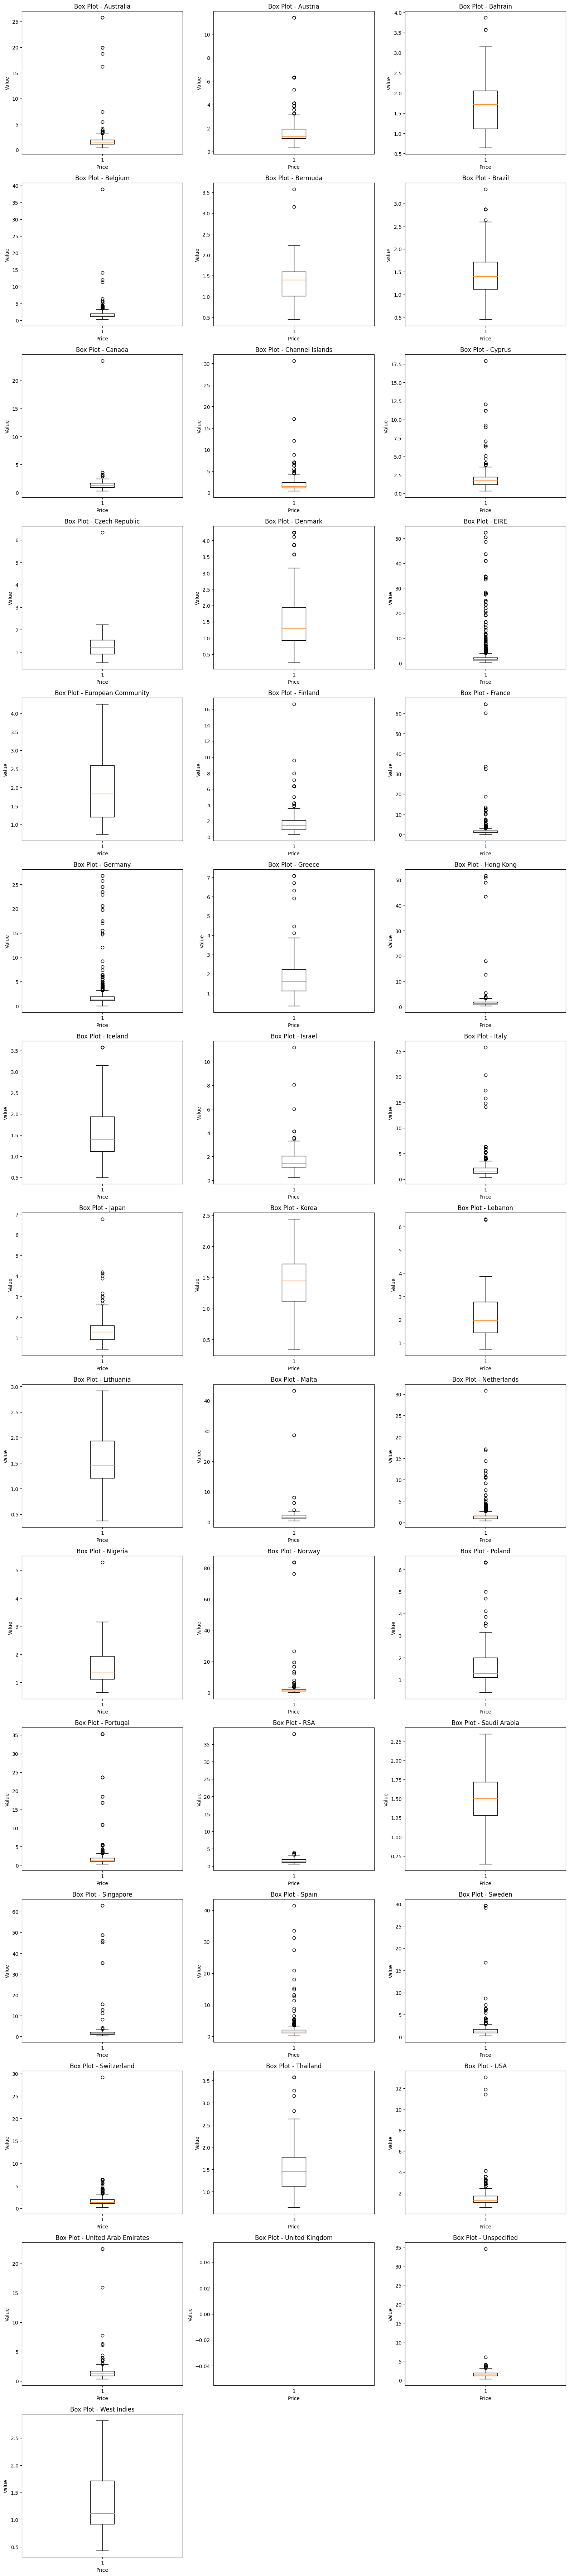

In [31]:
# Plotando os Boxplots para os preços

# Get the number of unique countries
num_countries = len(grouped_data)

# Calculate the number of rows and columns in the grid
num_rows = (num_countries + 2) // 3
num_cols = min(num_countries, 3)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 72))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and populate the subplots with box plots
for i, (country, group) in enumerate(grouped_data):
    ax = axes[i]
    ax.boxplot(group['Price'])
    ax.set_xlabel('Price')
    ax.set_ylabel('Value')
    ax.set_title(f'Box Plot - {country}')

# Remove any empty subplots
if num_countries < len(axes):
    for i in range(num_countries, len(axes)):
        fig.delaxes(axes[i])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

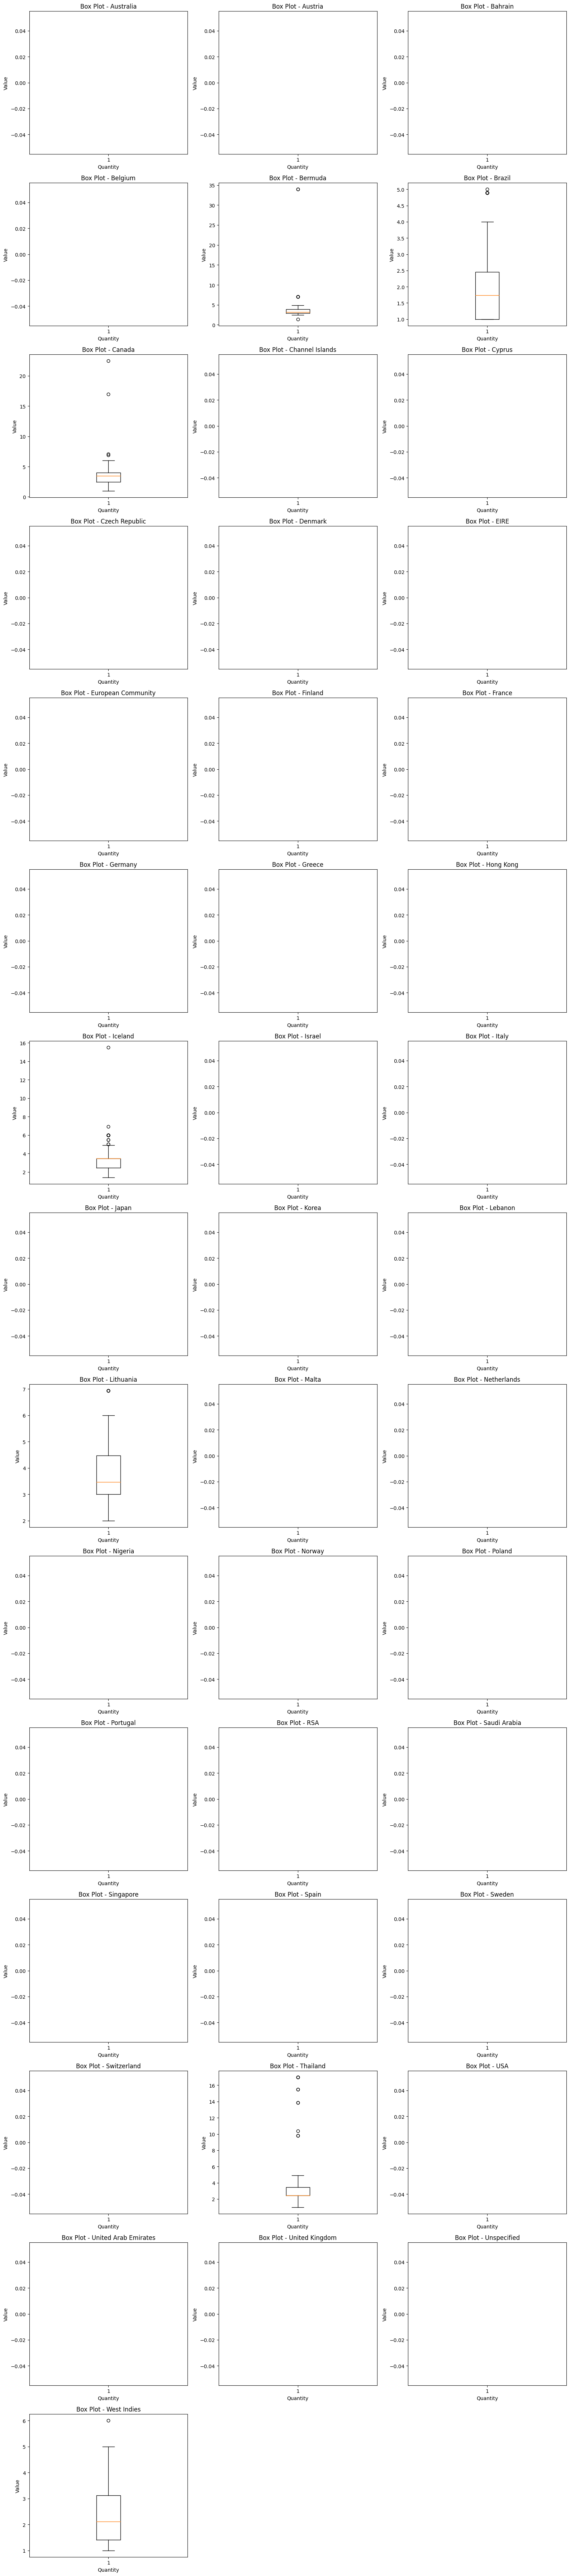

In [32]:
# Plotando os Boxplots para as quantidades

# Get the number of unique countries
num_countries = len(grouped_data)

# Calculate the number of rows and columns in the grid
num_rows = (num_countries + 2) // 3
num_cols = min(num_countries, 3)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 72))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and populate the subplots with box plots
for i, (country, group) in enumerate(grouped_data):
    ax = axes[i]
    ax.boxplot(group['Quantity'])
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Value')
    ax.set_title(f'Box Plot - {country}')

# Remove any empty subplots
if num_countries < len(axes):
    for i in range(num_countries, len(axes)):
        fig.delaxes(axes[i])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calcule as médias agrupadas por país
medias_paises = data.groupby('Country').mean()
medias_paises = medias_paises.reset_index()
medias_paises

In [ ]:
# Initialize an empty DataFrame to store the pivoted data
pivot_data = pd.DataFrame()

# Iterate over unique countries
for country in data['Country'].unique():
    # Filter the data for the current country
    country_data = data[data['Country'] == country]
    
    # Create a new column for the current country and fill it with the corresponding price values
    pivot_data[country +'_price'] = country_data['Price'].reset_index(drop=True)
    
    # Create a new column for the current country and fill it with the corresponding price values
    pivot_data[country + '_quantity'] = country_data['Quantity'].reset_index(drop=True)

pivot_melt_data = pd.melt(pivot_data).dropna().reset_index(drop=True)   


In [ ]:
# Print the pivoted data
pivot_data


## ANOVA e Teste de Hipótese

Queremos testar as medias de grupos diferentes assumindo as seguintes condiçoes:<br> 

Para testar a diferença das médias, começamos com uma Hipótese Nula $H_0$ :<br>
$ H_0 = μ_1 = μ_2 = ···= μ_m$<br>

Assumimos homocedasticidade ou seja que a variabilidade das observações em cada grupo em relação à média do grupo é a mesma para todos os grupos. <br>
$ σ^2_1 = σ^2_2 = · · · = σ^2_m$ <br>

A principio assumimos que os resultados dos testes retornem um modelo com distribução normal

In [ ]:
#Criando a tabela dos preços

tab_pri = pivot_data.copy()

tab_pri = tab_pri.filter(like="_price")
tab_pri = pd.melt(tab_pri).dropna().reset_index(drop=True)
tab_pri

In [ ]:
# Criando a tabela para as quantidades

tab_qua = pivot_data.copy()

tab_qua = tab_qua.filter(like="_quantity")
tab_qua = pd.melt(tab_qua).dropna().reset_index(drop=True)
tab_qua

In [ ]:
# Ordinary Least Squares (OLS) model for prices

model = ols('value ~ variable', data=tab_pri).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
# Ordinary Least Squares (OLS) model for Quantity
model = ols('value ~ variable', data=tab_qua).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

Dos resultados **PR(>F)** obtidos podemos dizer que temos acerca do 50%  de probabilidade de errar se reijetarmos a ipotese incial nula. 
<br>Para ser reijetada, pelo meno umas das medias entre as carteiras deveria ser significativamente diferente. <br>
Por tanto continuamos assumindo igualdade entre as carteiras e que a ipotesi nula não è rejeitada.

### Test par a par de Tukey

In [ ]:
# Tukey Test Price

df_melt_value = tab_pri["value"]
df_melt_variable = tab_pri["variable"]

tukey = pairwise_tukeyhsd(endog=df_melt_value,
                           groups=df_melt_variable,
                           alpha=0.05)
print(tukey)

Conforme com os dados do **P-value** obtidos, apesar de a hipotese nula não ser sida rejeitada, è preciso observar a forte desigualdade no *Q–Q plot (quantile-quantile plot)* das amostras alongo da linea reta o que significa que o modelo não esta seguindo uma distribução normal.

In [ ]:
# Tukey Test for Quantity

df_melt_value = tab_qua["value"]
df_melt_variable = tab_qua["variable"]

tukey = pairwise_tukeyhsd(endog=df_melt_value,
                           groups=df_melt_variable,
                           alpha=0.05)

print(tukey)

In [ ]:
import statsmodels.graphics.gofplots as smg

# Perform ANOVA for Price and Quantity for each country
countries = data['Country'].unique()
for country in countries:
    country_data = data[data['Country'] == country]
    model = ols('Quantity ~ Price', data=country_data).fit()
    residuals = model.resid
    
    # Plot the Q-Q plot of the residuals for the current country
    smg.qqplot(residuals, line='s')
    
    # Set plot labels and title
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.title(f'Q-Q Plot of ANOVA Residuals - {country}')
    
    # Display the plot
    plt.show()

#### Tests pra verificar Normalidade: Shapiro-Wilk, Kolmogorov-Smirnov

Vamos rodar 2 testes, de *Shapiro-Wilk* e de *Kolmogorov-Smirnov* para verificar a hipotese de normalidade. <br>
Para esses testes assumimos que a hipotese nula *$H_0$* seja uma variavel com Distribução Normal, por tanto se *P-value > alpha* então a hipotese *$H_0$* não pode ser rejeitada, e ao contrario se *P-value < alpha* então *$H_0$* pode ser reijetada ou seja a variavel não assume normalidade. <br>

Notar que o poder do teste de *S-W* è para volume de dados *N > 5000*, por tanto a nossa principal referência serà o resultado do *K-S* test.

In [ ]:
#Shapiro-Wilk on residuals for Price

w, pvalue = stats.shapiro(model.resid)
print('Statistics= %.3f, pvalue=%.3f' % (w, pvalue))
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Resíduo com Distribuição Normal (Não rejeita H0)')
else:
	print('Diferente da Normal (rejeita H0)')

In [ ]:
# perform the Kolmogorov-Smirnov test on the residuals for Price
k_statistic, pvalue = stats.kstest(model.resid, 'norm')

# print the results and interpret
alpha = 0.05
if pvalue > alpha:
    print('Resíduo com Distribuição Normal (Não rejeita H0)')
else:
    print('Diferente da Normal (rejeita H0)')

print('K-S Statistic= %.3f, pvalue=%.3f' % (k_statistic, pvalue))

#### Testes pra verificar homocedasticidade / heterocedasticidade, Barlett, Levene <br>

Vamos rodar 2 testes, de *Barlett* e de *Levene* para verificar a hipotese de homocedasticidade.
O objetivo è testar se tem differencias de variancias.<br>
Se assume a seguinte hipotese $H_0$: a variancia entre os grupos è igual. <br> 
Por tanto se *P-value > alpha* então a hipotese *$H_0$* não pode ser reijetada, em caso contrario se *P-value < alpha* terà variância diferente.

Conforme os resultados obtidos em ambos os testes accima, confirmamos a presencia de heterocedasticidade pois **P-value** è menor de 0.05. <br>

Diante de todos os dados obtidos, **por causa de falta de normalidade e presencia de heterocedasticidade** temos que reijetar o metodo ANOVA e optar por um modelo de test não parametrico para puder testar a hipotese $H_0$.

                                        ### questão b) ###


## Test de media "não ANOVA" ( assumindo não Normalidade )

Nesse Test de media "não ANOVA" se assume que não há distribução de normalidade.<br>
Mesmo assumindo um modelo não parametrico queremos verificar se as medias dos grupos são diferentes o que era a hipotese nula *$H_0$*  . <br>

Para alcançar nosso objetivo, executaremos 3 testes não paramétricos.<br>
O test de *Mann-Whitney* e de *Wilcoxon* são testados par a par entre os grupos de carteiras. Notar que esse ultimo test è eficiente para um volume alto de dados.<br>
O test de *Kruskal-Wallis* executa a comparação entre as medias de forma global.



### Mann-Whitney U Test

In [ ]:
    
show_mann = []

# Perform the Bartlett's test and Levene's test for each country's data
for country, group in grouped_data:
    quantity = group['Quantity']
    price = group['Price']
    
    # Perform Bartlett's test
    mann_stat, mann_pvalue = mannwhitneyu(quantity, price)
    
    print("Country:", country)
    print("Mann-Whitney U Test :")
    print("Test Statistic:", mann_stat)
    print("p-value:", mann_pvalue)
    print('-------------------------------------------')
    
    # Proceed to show if variances are not significantly different
    if mann_pvalue > 0.05:
        show_mann.append(country)
        
show_mann

### Wilcoxon signed-rank Test

In [ ]:
show_wil = []

# Perform the Wilcoxon signed-rank Test for each country's data
for country, group in grouped_data:
    quantity = group['Quantity']
    price = group['Price']
    
    # Wilcoxon signed-rank Test
    wil_stat, wil_pvalue = wilcoxon(quantity, price)
    
    print("Country:", country)
    print("Wilcoxon signed-rank Test :")
    print("Test Statistic:", wil_stat)
    print("p-value:", wil_pvalue)
    print('-------------------------------------------')
    
    # Proceed to show if variances are not significantly different
    if wil_pvalue > 0.05:
        show_wil.append(country)
        
show_wil

### Kruskal-Wallis Test

In [ ]:
show_krus = []

# Perform the Kruskal-Wallis Test for each country's data
for country, group in grouped_data:
    quantity = group['Quantity']
    price = group['Price']
    
    # Kruskal-Wallis Test
    krus_stat, krus_pvalue = kruskal(quantity, price)
    
    print("Country:", country)
    print("Kruskal-Wallis Test :")
    print("Test Statistic:", krus_stat)
    print("p-value:", krus_pvalue)
    print('-------------------------------------------')
    
    # Proceed to show if variances are not significantly different
    if krus_pvalue > 0.05:
        show_krus.append(country)
        
show_krus

Foram rodados 3 testes diferentes para testar a mesma coisa ou seija verificar se as medias entre as carteias são diferentes.<br>
A escolha de rodar varios testes foi devida as carateristicas de cada test; Tem testes que perdem poder por causa de quantidade de dados ou se adaptam melhor a depender da convergencia. <br> 
De boa pratica, è conveniente fazer varios testes para comparar entre eles, assim fazendo, o metodo pra testar serà mais robusto.

In [ ]:
print(show_shapiro_price)
print(show_shapiro_quant)

print('Anova', show_anova)
print('Tukey test', show_tukey)

print('Normalidade dos residuos', show_shapiro)
print('Normalidade dos residuos', show_smirnov)
print('Homocedasticidade', show_bartlett)

print('Testes Nao parametricos')
print(show_mann)
print(show_krus)
print(show_wil)

#### Conclusoes finais <br>
Conforme os resultados obtidos nos testes parametricos usados na ANOVA e nos 3 testes não parametricos, 
chegamos a conclusão que todos os testes deram o mesmo resultado que $H_0$ não pode ser rejeitada. <br> Por tanto podemos afirmar com boa robusteza que as medias entre os 3 grupos tendem a ser iguais.

In [ ]:
w, pvalue = stats.bartlett(prova1)
print('Statistics= %.3f, pvalue=%.3f' % (w, pvalue))
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Same Variance (Não rejeita H0)')
else:
	print('Different Variance (rejeita H0)')